In [1]:
from __future__ import division, print_function, absolute_import, unicode_literals


# Python imports
import numpy as np  # Matrix and vector computation package
import matplotlib.pyplot as plt  # Plotting library
import seaborn
# Allow matplotlib to plot inside this notebook
%matplotlib inline
# Set the seed of the numpy random number generator so that the tutorial is reproducable
np.random.seed(seed=1)

from matplotlib import animation, rc
from IPython.display import HTML, Image

# equivalent to rcParams['animation.html'] = 'html5'
rc('animation', html='html5')

In [2]:
func = lambda p: p * np.sin(p**2)
func_d = lambda p: np.sin(p**2) + 2 * (p**2) * np.cos(p**2)

p_left, p_right = -2.3, 1.5
ps = np.linspace(p_left, p_right, num=100)
ys = func(ps)
yds = func_d(ps)

[]

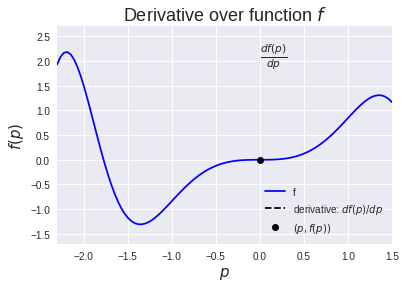

In [3]:
def plot_on_ax(ax1):
    ax1.plot(ps, ys, 'b-', label='f')
    # ax1.plot(ps, yds, 'r-')
    ax1.set_xlim([p_left, p_right])
    ax1.set_ylim([-1.7, 2.7])
    ax1.set_xlabel('$p$', fontsize=15)
    ax1.set_ylabel('$f(p)$', fontsize=15)
    ax1.set_title('Derivative over function $f$', fontsize=18)
    grad_line, = ax1.plot([0], [0], 'k--', label='derivative: $df(p) / dp$')
    arrow = ax1.axes.annotate(
        '', xytext=(0, 0), xy=(0, 0), 
        arrowprops=dict(arrowstyle="->", color='r', lw=2), size=10, annotation_clip=True)
    arrow.set_animated(True)
    grad_text = ax1.text(0, 2, '$\\frac{df(p)}{dp}$', fontsize=15)
    p_point, = ax1.plot([0], [0], 'ko', label='$(p, f(p))$')
    ax1.legend(loc=4)
    return grad_line, p_point, grad_text, arrow

def get_fig():
    fig, ax1 = plt.subplots()
    grad_line, p_point, grad_text, arrow = plot_on_ax(ax1)
    return fig, ax1, grad_line, p_point, grad_text, arrow

fig, ax1, grad_line, p_point, grad_text, arrow = get_fig()
plt.plot()

In [4]:
print(type(grad_text))
print(dir(grad_text))
print(grad_text.get_text())

<class 'matplotlib.text.Text'>
['__class__', '__delattr__', '__dict__', '__doc__', '__format__', '__getattribute__', '__getstate__', '__hash__', '__init__', '__module__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_agg_filter', '_alpha', '_animated', '_axes', '_bbox_patch', '_cached', '_clipon', '_clippath', '_color', '_contains', '_draw_bbox', '_fontproperties', '_get_dist_to_box', '_get_layout', '_get_multialignment', '_get_rendered_text_width', '_get_wrap_line_width', '_get_wrapped_text', '_get_xy_display', '_gid', '_horizontalalignment', '_label', '_linespacing', '_mouseover', '_multialignment', '_oid', '_path_effects', '_picker', '_prop_order', '_propobservers', '_rasterized', '_remove_method', '_renderer', '_rotation', '_rotation_mode', '_set_gc_clip', '_sketch', '_snap', '_stale', '_sticky_edges', '_text', '_transform', '_transformSet', '_update_clip_properties', '_url', '_usetex', '_verticala

p:  1
fp:  0.841470984808
dfp:  1.92207559654
p_start:  1.46154189504
p_end:  0.538458104957
['__class__', '__delattr__', '__dict__', '__doc__', '__format__', '__getattribute__', '__getstate__', '__hash__', '__init__', '__module__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_agg_filter', '_alpha', '_animated', '_annotation_clip', '_arrow_relpos', '_axes', '_bbox_patch', '_cached', '_check_xy', '_clipon', '_clippath', '_color', '_contains', '_draggable', '_draw_bbox', '_fontproperties', '_get_dist_to_box', '_get_layout', '_get_multialignment', '_get_position_xy', '_get_ref_xy', '_get_rendered_text_width', '_get_wrap_line_width', '_get_wrapped_text', '_get_xy', '_get_xy_display', '_get_xy_transform', '_gid', '_horizontalalignment', '_label', '_linespacing', '_mouseover', '_multialignment', '_oid', '_path_effects', '_picker', '_prop_order', '_propobservers', '_rasterized', '_remove_method', '_renderer'

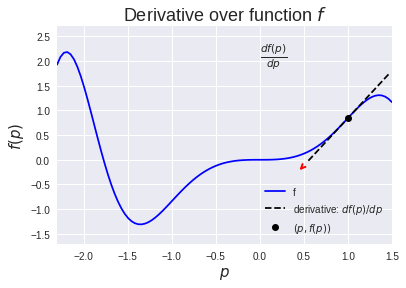

In [5]:
def get_deriv(p):
    fp = func(p)
    dfp = func_d(p)
    line_func = lambda x: dfp * (x-p) + fp
    return p, fp, dfp, line_func

def get_line_start_end(p, fp, dfp, line_func):
    distance = 1
    p1 = p + distance / np.sqrt(1+dfp**2)
    p2 = p - distance / np.sqrt(1+dfp**2)
    return p1, p2
    
    
p, fp, dfp, line_func = get_deriv(1)
print('p: ', p)
print('fp: ', fp)
print('dfp: ', dfp)


p_start, p_end = get_line_start_end(p, fp, dfp, line_func)
print('p_start: ', p_start)
print('p_end: ', p_end)

fig, ax1, grad_line, p_point, grad_text, arrow = get_fig()
grad_line.set_xdata([p_start, p_end])
grad_line.set_ydata([line_func(p_start), line_func(p_end)])
p_point.set_xdata(p)
p_point.set_ydata(fp)

In [6]:
def get_anim(fig, ax1, steps):
    p_left, p_right = -2.3, 1.5
    ps = np.linspace(p_left, p_right, num=steps)
    ys = func(ps)
    yds = func_d(ps)
    def anim(i):
        ax1.clear()
        grad_line, p_point, grad_text, arrow = plot_on_ax(ax1)
        # Get function to plot gradient line
        p, fp, dfp, line_func = get_deriv(ps[i])
        p_start, p_end = get_line_start_end(p, fp, dfp, line_func)
        # Plot gradient line
        grad_line.set_xdata([p_start, p_end])
        grad_line.set_ydata([line_func(p_start), line_func(p_end)])
        # Plot gradient point
        p_point.set_xdata(p)
        p_point.set_ydata(fp)
#         grad_line.set_label('derivative: $df(p) / dp$: {:+4.2f} \t'.format(dfp))
        grad_text.set_text('$\\frac{{df(p)}}{{dp}} = {:+.2f}$'.format(dfp))
        p_point.set_label('$(p, f(p))$: ({:+.2f},{:+.2f})'.format(p, fp))
        if dfp > 0.1:
            grad_line.set_color('r')
            grad_text.set_color('r')
            arrow = ax1.axes.annotate(
                '', xytext=(p_start, line_func(p_start)), xy=(p_start+0.01, line_func(p_start+0.01)), 
                arrowprops=dict(arrowstyle="->", color='r', lw=2), size=10)
        elif dfp < -0.1: 
            grad_line.set_color('g')
            grad_text.set_color('g')
            arrow = ax1.axes.annotate(
                '', xytext=(p_end, line_func(p_end)), xy=(p_end-0.01, line_func(p_end-0.01)), 
                arrowprops=dict(arrowstyle="->", color='g', lw=2), size=10)
        else:
            grad_line.set_color('k')
            grad_text.set_color('k')
            arrow = ax1.axes.annotate(
                '', xytext=(0, 0), xy=(0, 0), 
                arrowprops=dict(arrowstyle="->", color='k', lw=2), size=10)
        handles, labels = ax1.get_legend_handles_labels()
        ax1.legend(handles, labels, loc=4)
        return [grad_line, p_point, grad_text, arrow]
    return anim

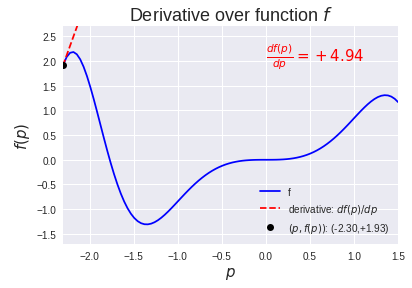

In [7]:
steps = 150
interval=100
fig, ax1, grad_line, p_point, grad_text, arrow = get_fig()
animate = get_anim(fig, ax1, steps)
# call the animator. blit=True means only re-draw the parts that 
# have changed.
anim = animation.FuncAnimation(fig, animate, frames=steps, interval=interval, blit=False)

In [8]:
anim

In [11]:
gif_path = './gradient.gif'
anim.save('./gradient.gif', writer='imagemagick', fps=1000/interval)
Image(url=gif_path)